<a href="https://colab.research.google.com/github/AnnaKraim/ML/blob/main/titanic_eda_logreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df = pd.read_csv('titanic (1).csv')

In [ ]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Давайте посмотрим на пропуски

In [ ]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

Сколько человек выжило ?

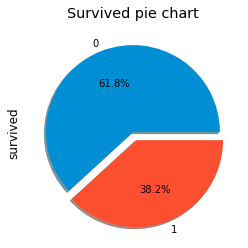

In [ ]:
df['survived'].value_counts().plot.pie(explode=[0, 0.1],autopct='%1.1f%%',shadow=True)
plt.title('Survived pie chart')
plt.show()

Воспользуемся библиотекой seaborn для визуализации

Будем использовать countplot — удобная гистрограмма по количеству значений столбца

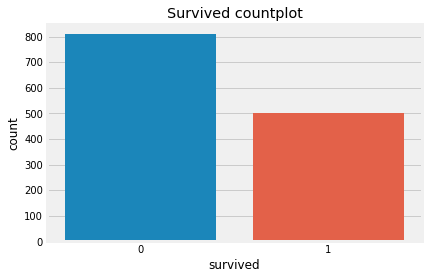

In [ ]:
sns.countplot('survived',data=df)
plt.title('Survived countplot')
plt.show()

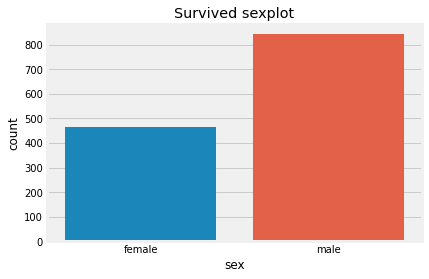

In [ ]:
sns.countplot('sex',data=df)
plt.title('Survived sexplot')
plt.show()

Давайте посмотрим как пол влияет на выживаемость

In [ ]:
df.groupby(['sex'])['survived'].count()

sex
female    466
male      843
Name: survived, dtype: int64

In [ ]:
df.groupby(['sex', 'survived'])['survived'].count()

sex     survived
female  0           127
        1           339
male    0           682
        1           161
Name: survived, dtype: int64

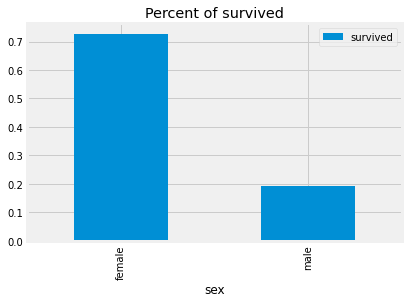

In [ ]:
df[['sex','survived']].groupby(['sex']).mean().plot.bar()
plt.title('Percent of survived')
plt.show()

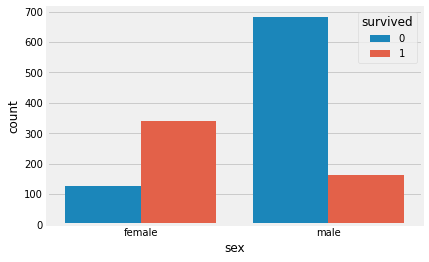

In [ ]:
sns.countplot('sex',hue='survived',data=df)
plt.show()

Можно посмотреть на этот график с другой стороны

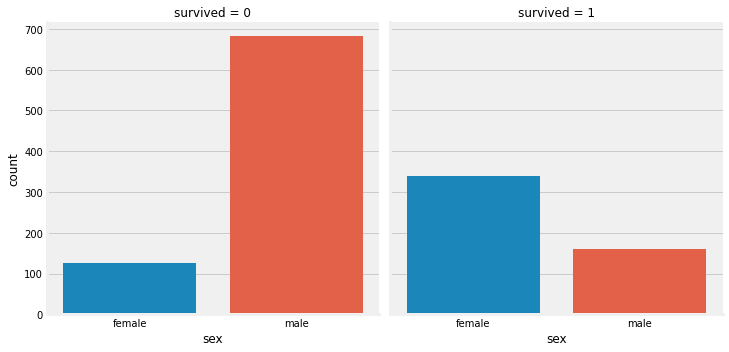

In [ ]:
# Тут мы просим сделать график по категории sex, колонки survived
sns.catplot(x='sex', col='survived', kind='count', data=df)
plt.show()

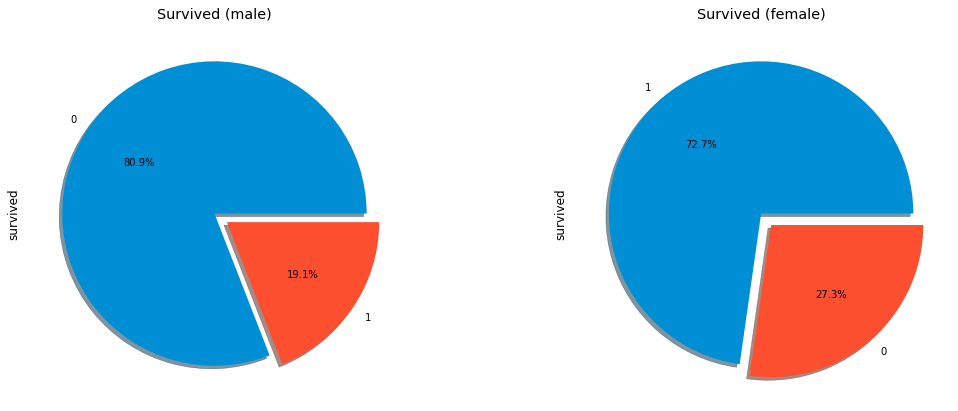

In [ ]:
# Два подграфика
#                1 строчка 2 столбца
f,ax=plt.subplots(1,2,figsize=(16,7))

# Поискать как задать одинаковый цвет для класса 1 или 0

df[df['sex']=='male']['survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
df[df['sex']=='female']['survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')

plt.show()

Делаем выводы... идем к другим переменным

Посмотрим как влияет класс пасажира

In [ ]:
pd.crosstab(df['pclass'], df['survived'], margins=True).style.background_gradient(cmap='autumn_r')

survived,0,1,All
pclass,,,
1,123,200,323
2,158,119,277
3,528,181,709
All,809,500,1309


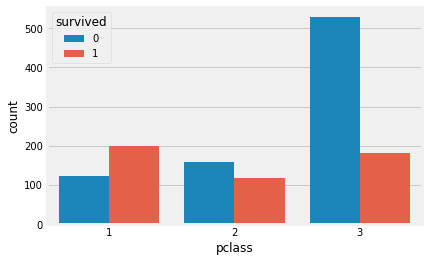

In [ ]:
sns.countplot('pclass',hue='survived',data=df)
plt.show()

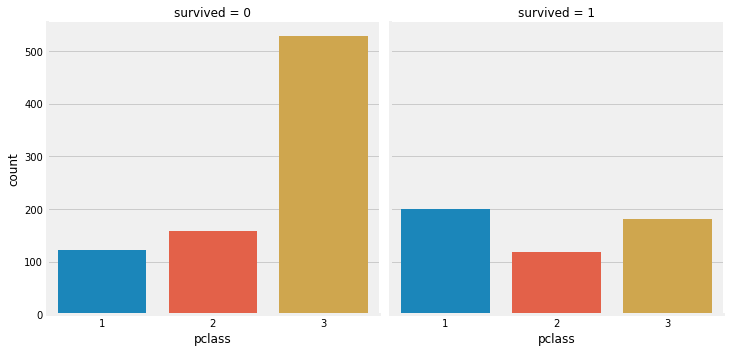

In [ ]:
sns.catplot(x='pclass',col='survived', kind='count', data=df);

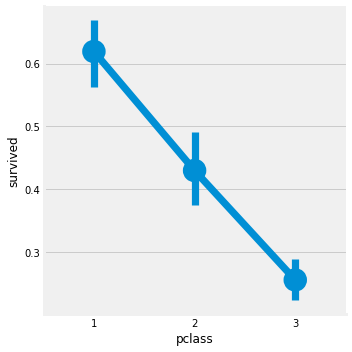

In [ ]:
sns.catplot(x='pclass',y='survived', kind='point', data=df)
plt.show()

Видно как класс билета влияет на выживаемость. 

Давайте посмотрим на связь с полом

In [ ]:
pd.crosstab([df['sex'], df['pclass']], df['survived'], margins=True).style.background_gradient(cmap='autumn_r')

In [ ]:
pd.crosstab(df['survived'],[df['sex'], df['pclass']], margins=True).style.background_gradient(cmap='autumn_r')

In [ ]:
pd.crosstab([df['sex'],df['survived']],df['pclass'],margins=True).style.background_gradient(cmap='summer_r')

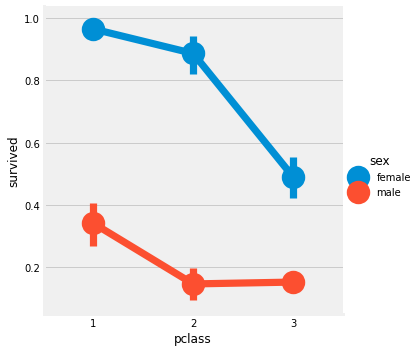

In [ ]:
sns.catplot(x='pclass',y='survived',hue='sex', kind='point', data=df)

А что насчет embarked ?

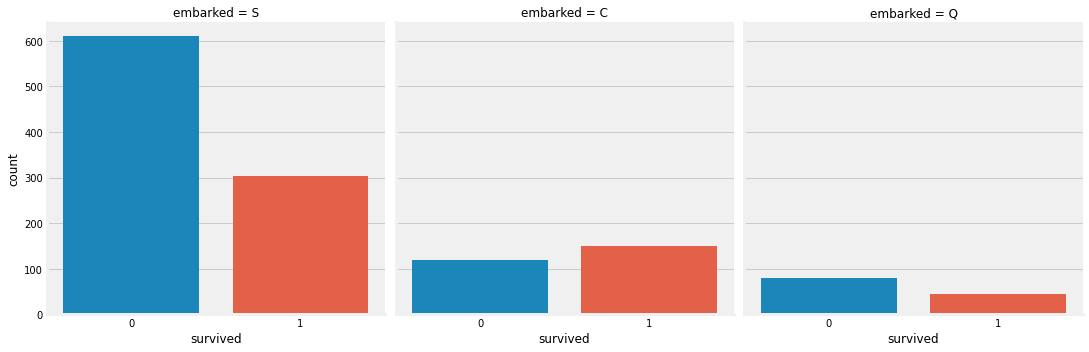

In [ ]:
sns.catplot(x='survived', col='embarked', kind='count', data=df)
plt.show()

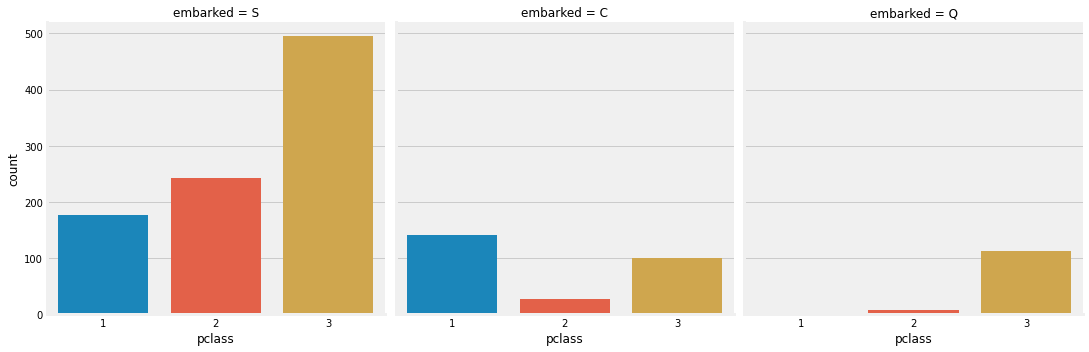

In [ ]:
sns.catplot(x='pclass', col='embarked', kind='count', data=df)
plt.show()

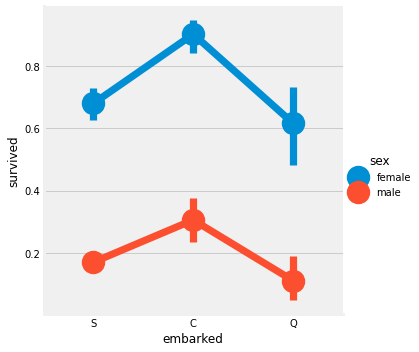

In [ ]:
sns.catplot('embarked','survived', hue= 'sex', kind='point', data=df)
plt.show()

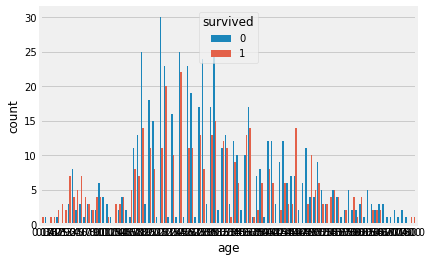

In [ ]:
sns.countplot('age',hue='survived',data=df)


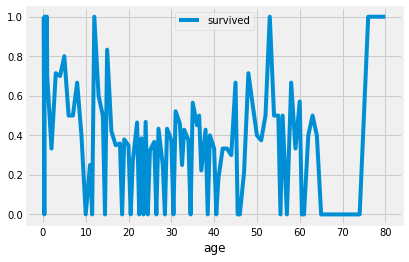

In [ ]:
df[['age','survived']].groupby(['age']).mean().sort_index().plot.line()

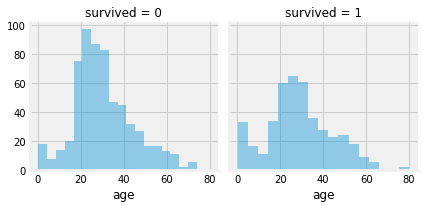

In [ ]:
g = sns.FacetGrid(data=df, col='survived')
g.map(sns.distplot, 'age', kde=False)
plt.show()

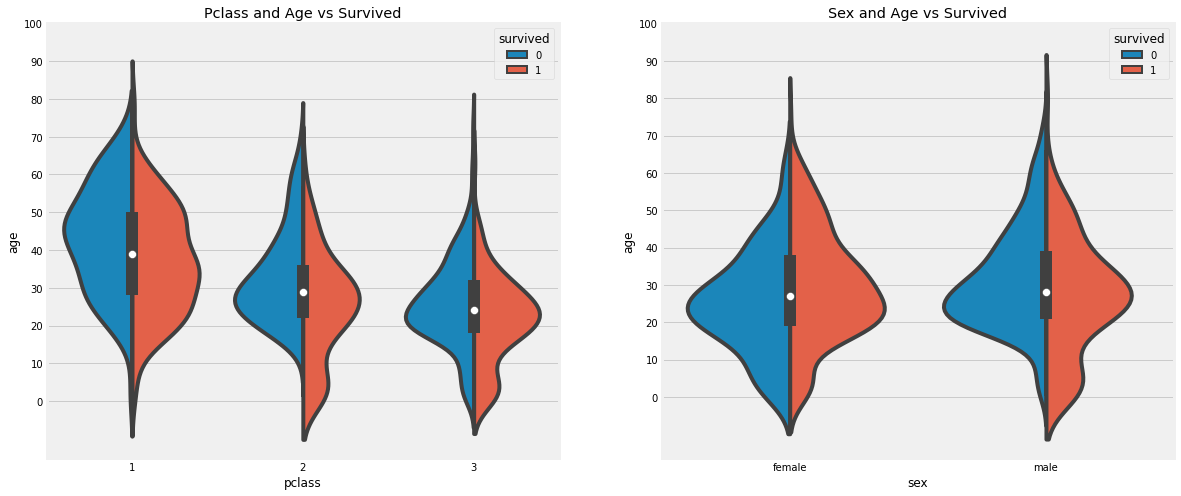

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("pclass","age", hue="survived", data=df,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("sex","age", hue="survived", data=df,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [ ]:
df['age_band']=0
df.loc[df['age']<=16,'age_band']=0
df.loc[(df['age']>16)&(df['age']<=32),'age_band']=1
df.loc[(df['age']>32)&(df['age']<=48),'age_band']=2
df.loc[(df['age']>48)&(df['age']<=64),'age_band']=3
df.loc[df['age']>64,'age_band']=4
df.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_band
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0


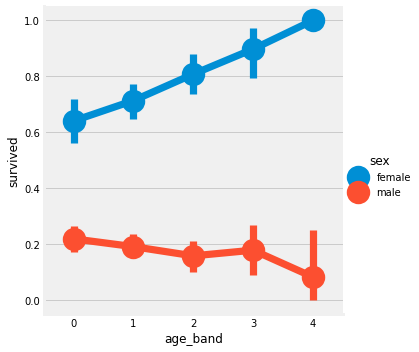

In [ ]:
sns.catplot('age_band','survived',hue='sex',kind='point',data=df)
plt.show()

In [ ]:
df['age_bin']=np.nan
for i in range(8,0,-1):
  df.loc[ df['age'] <= i*10, 'age_bin'] = i

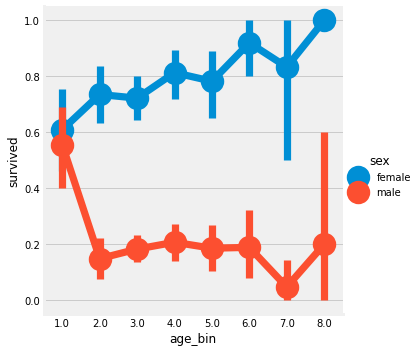

In [ ]:
sns.catplot('age_bin','survived',hue='sex',kind='point',data=df);

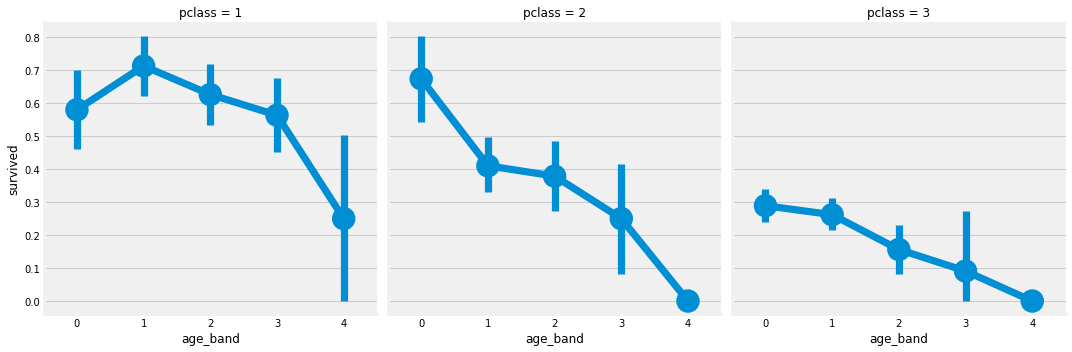

In [ ]:
sns.factorplot('age_band','survived',data=df,col='pclass')
plt.show()

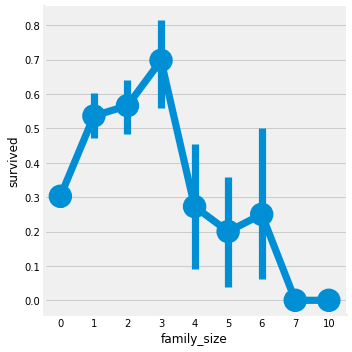

In [ ]:
df['family_size']=0
df['family_size']=df['parch']+df['sibsp'] #размер семьи
df['alone']=0
df.loc[df.family_size==0,'alone']=1 #Ехал в одиночку


sns.factorplot('family_size','survived',data=df,ax=ax[0])
plt.show()

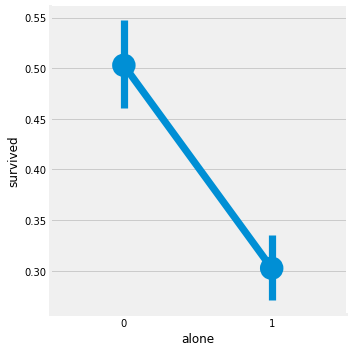

In [ ]:
sns.factorplot('alone','survived',data=df,ax=ax[1])
plt.show()

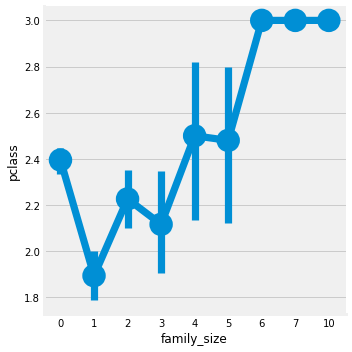

In [ ]:
sns.factorplot('family_size','pclass',data=df,ax=ax[0])

In [ ]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_band,age_bin,family_size,alone
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,3.0,0,1
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0,1.0,3,0
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,1.0,3,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1,3.0,3,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,3.0,3,0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


y = df['survived']



data_model1 = df[['age', 'sex', 'parch', 'sibsp', 'pclass']]

data_model1 = pd.get_dummies(data_model1, drop_first=True)

data_model1['age'] = data_model1['age'].fillna(method='backfill')


lr = LogisticRegression()

# lr.fit(data_model1, y)

cross_val_score(lr, data_model1, y, cv = KFold(shuffle=True)).mean()



0.7914304934046971

In [ ]:
data_model2 = df[['age_bin', 'sex', 'family_size', 'pclass', 'embarked']]

data_model2 = pd.get_dummies(data_model2, drop_first=True)

# data_model2 = data_model2.drop('sex_female', axis=1)

data_model2['pclass_1'] = data_model2['pclass'] == 1
data_model2['pclass_2'] = data_model2['pclass'] == 2
data_model2['pclass_3'] = data_model2['pclass'] == 3
data_model2 = data_model2.drop('pclass', axis=1)
data_model2['age_bin'] = data_model2['age_bin'].fillna(4)

lr = LogisticRegression()
cross_val_score(lr, data_model2, y, cv = KFold(shuffle=True)).mean()

0.7884004562604193

In [ ]:
lr.fit(data_model2, y)

np.array([data_model2.columns, lr.coef_[0]]).T

array([['age_bin', -0.31244791839997976],
       ['family_size', -0.14826837062203482],
       ['sex_male', -2.529395025949424],
       ['embarked_Q', -0.43590258098893586],
       ['embarked_S', -0.6169442478903518],
       ['pclass_1', 0.9581421778901078],
       ['pclass_2', -0.02067881412142165],
       ['pclass_3', -0.9366462406826415]], dtype=object)